In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [16]:
energy_cap = pd.read_csv("../build/postprocessed_results/energy_cap.csv")
energy_cap.head()

,locs,techs,energy_cap
0,ALB_1,ac_ohl_mountain_transmission:GRC_1,0.017828
1,ALB_1,ac_ohl_mountain_transmission:MKD_1,0.034403
2,ALB_1,ac_ohl_transmission:MNE_1,0.054418
3,ALB_1,ac_ohl_transmission:SRB_1,0.042820
4,ALB_1,battery,0.003306


In [64]:
df = energy_cap.copy()
df["locs"] = df["locs"].replace({"_\\d+$": ""}, regex=True)
df = df.groupby(["locs", "techs"]).sum().reset_index().set_index("locs")
df

,techs,energy_cap
locs,,
ALB,ac_ohl_mountain_transmission:GRC_1,0.017828
ALB,ac_ohl_mountain_transmission:MKD_1,0.034403
ALB,ac_ohl_transmission:MNE_1,0.054418
ALB,ac_ohl_transmission:SRB_1,0.042820
ALB,battery,0.003306
...,...,...
SWE,syn_methanol_distribution_import,15.116293
SWE,waste_supply,1.567988
SWE,wind_offshore,10.591064


<Axes: xlabel='locs'>

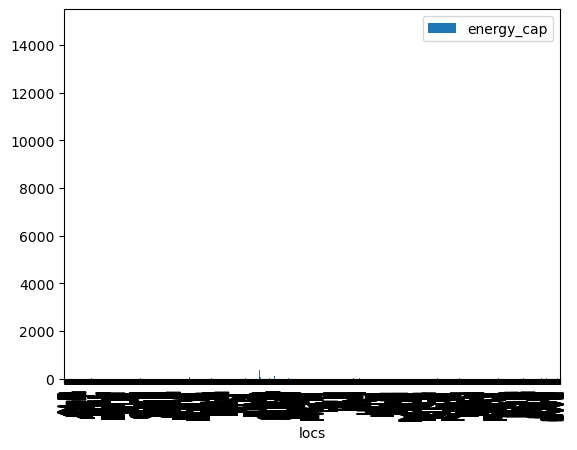

In [55]:
df.loc[df.techs.apply(lambda x: "transmission" not in x, 1),:]

<Axes: xlabel='locs'>

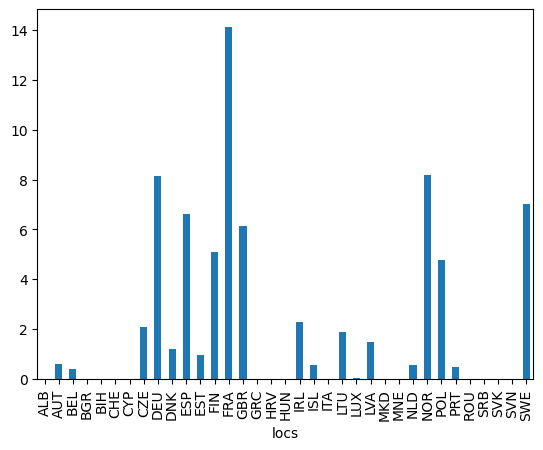

In [54]:
df.loc[df["techs"]=='wind_onshore_competing', 'energy_cap'].plot.bar()

<Axes: xlabel='locs,techs'>

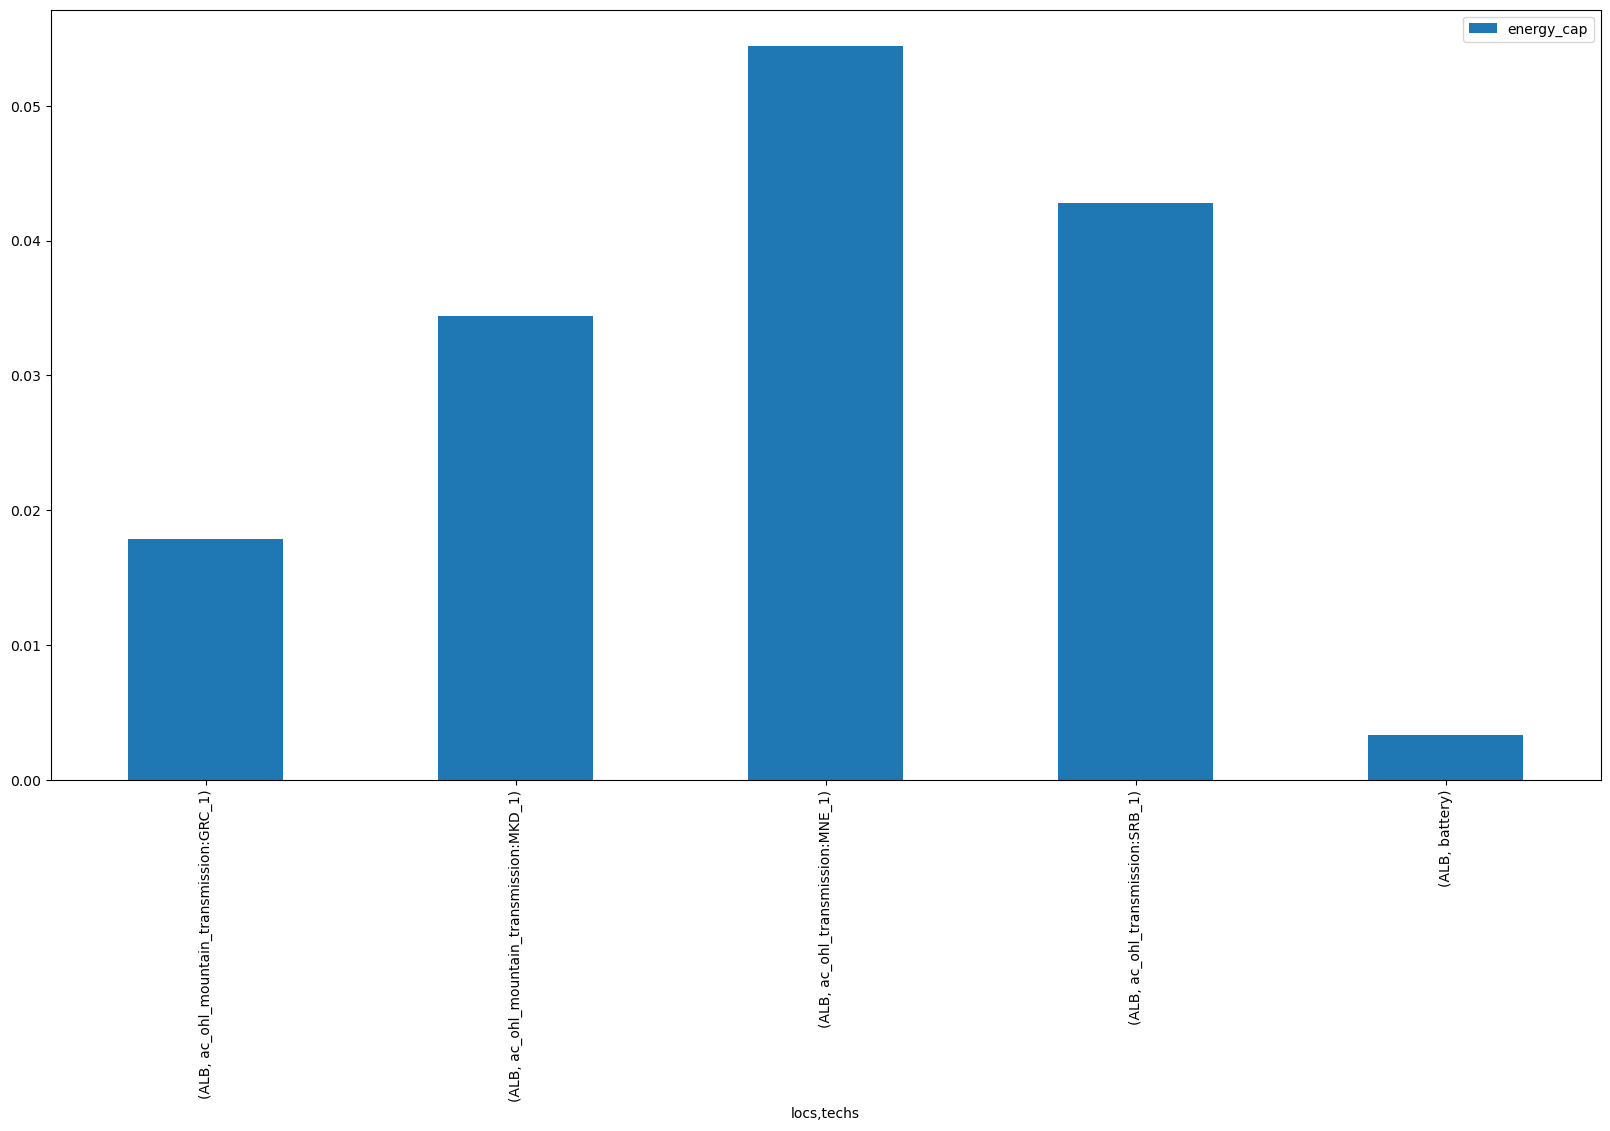

In [43]:
df.reset_index().set_index(["locs", "techs"]).head().plot.bar(stacked=True, figsize=(20, 10))


In [65]:
df = df.loc[df.techs.apply(lambda x: "transmission" not in x, 1),:]
df = df.reset_index()
import plotnine as pn

In [74]:
for i in df.techs.unique():
    print(i)
    # open_field_pv
    # roof_mounted_pv

battery
biofuel_boiler
biofuel_heat_storage_small
biofuel_supply
biofuel_tech_heat_to_demand
biofuel_to_diesel
biofuel_to_liquids
biofuel_to_methane
biofuel_to_methanol
ccgt
chp_biofuel_extraction
chp_biofuel_extraction_heat_storage_big
chp_biofuel_extraction_tech_heat_to_demand
chp_hydrogen
chp_hydrogen_heat_storage_big
chp_hydrogen_tech_heat_to_demand
chp_methane_extraction
chp_methane_extraction_heat_storage_big
chp_methane_extraction_tech_heat_to_demand
chp_wte_back_pressure
chp_wte_back_pressure_heat_storage_big
chp_wte_back_pressure_tech_heat_to_demand
dac
demand_cooking
demand_elec
demand_heat
demand_heavy_transport
demand_industry_diesel
demand_industry_kerosene
demand_industry_methane
demand_industry_methanol
demand_light_transport
electric_heater
electric_heater_heat_storage_small
electric_heater_tech_heat_to_demand
electric_hob
electrolysis
gas_hob
heavy_transport_ev
heavy_transport_ice
hp
hp_heat_storage_small
hp_tech_heat_to_demand
hydro_reservoir
hydro_run_of_river
hydrog

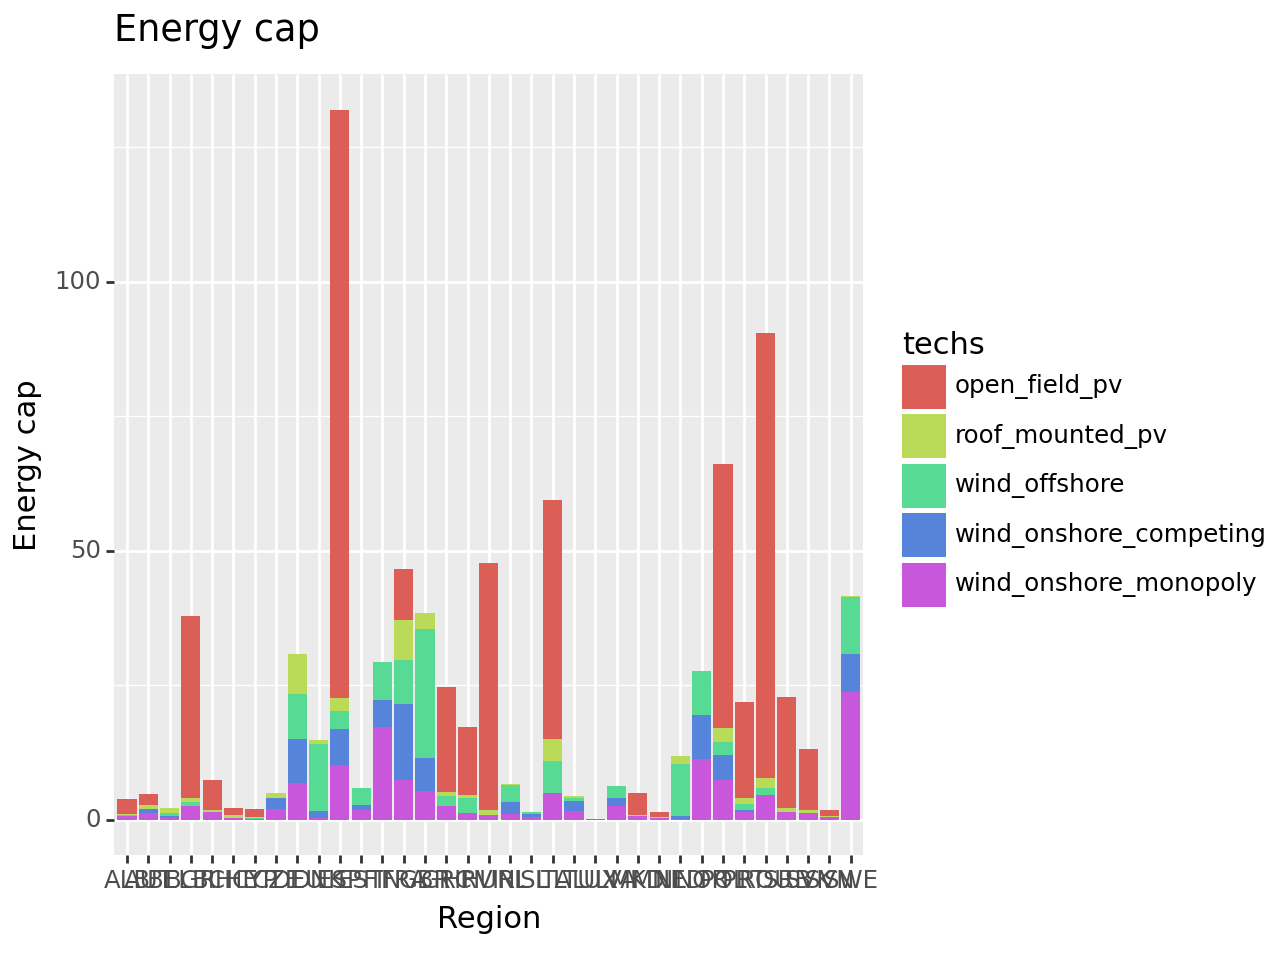

<Figure Size: (640 x 480)>

In [80]:
renewables = ["open_field_pv", "roof_mounted_pv", "wind", "awe"]
(
    pn.ggplot(df.loc[df.techs.apply(lambda x: any([ren in x for ren in renewables]), 1),:])
    + pn.geom_col(pn.aes(x="locs", y="energy_cap", fill="techs"))
    + pn.labs(x="Region", y="Energy cap", title="Energy cap")
    + pn.scale_color_discrete(guide=False)
)
# TODO: assign colors
# TODO: Drop transmission or color them similarly
# TODO: Handle units
# TODO: Map labels to names